# Prueba y Estimación

Utilizando los datos obtenidos de las muestras recolectadas, se realiza la **prueba de hipótesis** para verificar suposiciones sobre la distribución de la población, y la **estimación** para calcular los parámetros poblacionales.

En este capítulo, estudiaremos la prueba de hipótesis y la estimación, con el objetivo de que el estudiante sea capaz de hacer lo siguiente:

* Explicar los procedimientos para la prueba de hipótesis y la estimación basados en varios tipos de datos de medición (variables continuas).

* Explicar y calcular la potencia de una prueba.

* Explicar los procedimientos para la prueba de hipótesis y la estimación basados en varios tipos de datos de recuento(variables discretas).

[Audio_1](https://drive.google.com/file/d/1ttT5XWjGeHgwxip10hpQZyyxviBp4RqB/view?usp=drive_link)



In [149]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [150]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## 04-01 Prueba y Estimación
検定と推定

### 1. ¿Qué es una prueba?
検定とは

La prueba de hipótesis consiste en establecer una **proposición (hipótesis) sobre una población** de acuerdo con un objetivo específico, y luego usar los datos obtenidos de una muestra para determinar si es razonable considerar que dicha proposición es válida.

En una proeba de **hipótesis alternativa: H1**（対立仮説）, y la hipótesis que niega esta afirmación se denomina **hipótesis nula: H0**（帰無仮説).

En cuanto a la hipótesis alternativa, existen la **hipótesis bilateral**（両側仮説） y la **hipótesisi unilateral**（片側仮説）.
Los tests correspondientes para cada caso se denominan test bilateral y test unilateral, respectivamente.

Se conoce como **error de Tipo I** al error de rechazar la hipótesis nula a pesar de que esta sea correcta.
La probabilidad de cometer este error se denomina nivel de significancia o riesgo, y  el símbolo **$ \alpha $**.

* 慌て者の誤り

El error de no rechazar la hipótesis nula a pesar de que la hipótesis alternativa es correcta se denomina **error de Tipo II**, y su probabilidad se representa con el símbolo **$ \beta $**.

* ぼんやり者の誤り

* 検出力（$ 1 - \beta $)


[Audio_2](https://drive.google.com/file/d/1o8MbmJXfYo-XhtGnZOVhIfyI9y5SMkMZ/view?usp=drive_link)



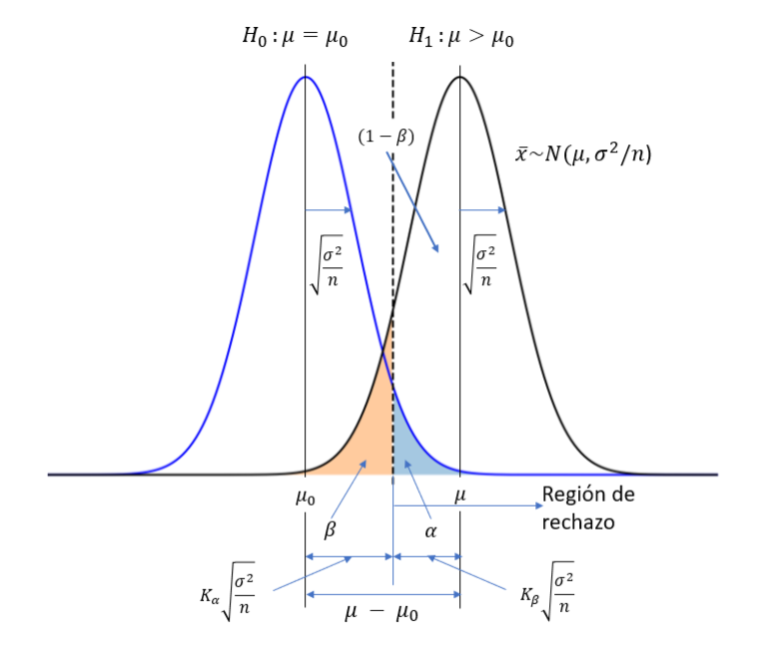

In [151]:
from IPython.display import display
from PIL import Image

img = Image.open('Graph3/Fig_4_1.png')
display(img)

### 2. Procedimiento de la prueba
検定の手順

Paso 1: Establecimiento de la hipótesis de la prueba

Paso 2: Establecimiento de la hipótesis nula $ H_0 $ y la hipótesis alternativa $ H_1 $
帰無仮説H0と対立仮説H1の設定

Paso 3: Selección del estadístico de prueba
検定推定量の選定

* En la prueba de la media de una población, cuando la varianza de la población es conocida, la población sigue una distribución normal $ N(\mu, \sigma^2) $. La media de una muestra de tamaño $ n $ extraída de esta población sigue una distribución normal $ N(\mu, \sigma^2 / n) $. Al estandarizar esto $ u= \frac{\bar{x} - \mu}{\sqrt{\sigma^2/n}}$ sigue una distribución normal estándar $ N(0, 1^2) $.

Paso 4: Establecimiento del nivel de significancia
有意水準の設定

Paso 5: Establecimiento de la región de rechazo
棄却域の設定

Paso 6: Cálculo del estadístico de prueba
検定統計量の計算

Paso 7: Decisión sobre el resultado de la prueba
検定結果の判定
* Calcula el valor de la estadística de prueba y compáralo con el valor de área de rechazo para tomar una decisión sobre la prueba. Si el valor está dentro del área de rechazo, se considera significativo; si no lo está, se considera no significativo.

Paso 8: Concusión
結論
* Como resultado de la prueba, si es significativo, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Si no es significativo, la hipótesis nula no se rechaza.

### 3. ¿Qué es una estimación?
推定とは

* La estimación consiste en estimar los parámetros de la población, como la media poblacional o la varianza poblacional, de una distribución de la población objetivo.
Existen dos tipos de estimación: la estimación puntual, que estima el parámetro utilizando un solo estimador, y la estimación por intervalo, que estima el parámetro utilizando un intervalo. En la estimación por intervalo, el ancho del intervalo (intervalo de confianza) se determina en función de la tasa de confianza $ (1-\alpha) $, que es la probabilidad de que el intervalo contenga el verdadero parámetro de la población.
El límite superior del intervalo de confianza se llama límite superior de confianza y el límite inferior se llama límite inferior de confianza.

### 4. Procedimiento de la estimación
推定の手順

Paso 1: Estimación puntual
点推定

* La estimación puntual consiste en inferir parámetros como la media poblacional $ \mu $ o la varianza poblacional $ \sigma^2 $ mediante un único valor. Se utilizan estimadores insesgados como la media muestral $ \bar{x} $ y la varianza muestral $ V $.
* $ \hat{x} = \bar{\mu} $

Paso 2: Estimación por intervalo
区間推定

* Variable aleatoria $ u = \frac{\bar{x} - \mu}{\sqrt{\sigma^2}/n}$
* Límite superior de confianza $ \mu_U = \bar{x} + u(0.05) \sqrt{\sigma^2/n} $
* Límite inferior de confianza $ \mu_L = \bar{x} - u(0.05) \sqrt{\sigma^2/n} $

[Audio_3](https://drive.google.com/file/d/1OVZjjJIUJAOXDCSmNOqlfVAI21UflYcu/view?usp=drive_link)

## 04-02 Pruebas y estimaciones basadas en datos de valores medibles
計量値データに基づく検定と推定



### 1. Pruebas y estimaciones sobre una o dos poblaciones
１つまたは２つの母集団に関する検定と推定

Existen muchos tipos de pruebas y estimaciones basadas en datos de valores mediados.

* Distribución normal estándar
標準正規分布

* Distribución t
ｔ分布

* Distribución ji-cuadrado
χ二乗分布

* Prueba de Welch
ウェルチの検定

* Distribución F
Ｆ分布

[Audio_4](https://drive.google.com/file/d/18DaNGdCjk1SydwUUZefUA7UAxWDCURPa/view?usp=drive_link)

### 2. Pruebas sobre varianzas de tres o más poblaciones
３つ以上の母分散に関する推定

Existen varios métodos para probar la **homogeneidad de las varianzas poblacionales** en tres o más poblaciones.
En estos casos, la **hipótesis nula** (H0) es que **todas las varianzas poblacionales son iguales**, y la **hipótesis alternativa** (H1) es que **hay al menos  una varianza que no es igual entre las k varianzas poblacionales**.

[Audio_5](https://drive.google.com/file/d/13Pk0984RzCjtvzuYAeciVaslopKWTlon/view?usp=drive_link)



## 4.1

５か所の分析センターで、廃液中成分Gの含有量の分析を行っている。今回、同一サンプルを用い各分析センターでそれぞれ５回の測定を行ったところ、以下の分散（単位 $ \%^2 $）が得られた。各センターでの測定値のバラつきが一様であるか検討せよ。

V1=0.50、V2=0.68、V3=0.23、V4=0.89、V5=0.71

En cinco centros de análisis se está llevando a cabo el análisis del contenido del componente G en el efluente residual. En esta ocasión, se realizó la medición en cada centro de análisis cinco veces utilizando la misma muestra, y se obtuvieron las siguientes varianzas (unidad:$ \%^2 $). Examine si la variabilidad en los valores medidos en cada centro es uniforme.

V1=0.50, V2=0.68, V3=0.23, V4=0.89, V5=0.71

#### Note:
Si los datos siguen una distribución normal, la prueba de Bartlett tiene una mayor potencia estadística.

En cambio, si los datos no siguen una distribución normal o si son sensibles a la influencia de valores atípicos, la prueba de Cochran puede ofrecer resultados más estables, lo que aumenta la probabilidad de mantener la potencia estadística.


Paso 1: Establecimiento de las hipótesis

* H0: La variabilidad de las mediciones en cada centro de análisis es uniforme.

* H1: La variabilidad de las mediciones en cada centro de análisis no es uniforme.

Paso 2: Establecimiento del nivel de significancia y la región de rechazo:

* $ \alpha = 0.05 $

* $ R: c \geq C(k, \phi : \alpha ) = C(5,4:0.05) $

* $ k = 5 \qquad \phi = n -1 = 4 $

$ C(k, \phi, : \alpha ) = C(5,4 : 0.05) = 0.544 $


Paso 3: Cálculo del estadístico de prueba

$ V_{max} = V_4 = 0.89 $

$ \sum V_i = V_1 + V_2 + V_3 + V_4 + V_5 = 3.01 $

$ c = V_{max} / \sum V_i = 0.296 $

Paso 4: Veredicto y Conclusión

$ c = 0.296 < C(5, 4: 0.05) = 0.544 $

* No es significativo. Es decir, no se puede afirmar que la variabilidad de las mediciones en cada centro de análisis no sea uniforme.

Estadística de Cochran:

$ c = \frac{max(V_i)}{\sum V_i} $

De hecho, el punto crítico al nivel de significancia $ \alpha $ puede calcularse usando la distribución F de la siguiente manera:

$ C_{crit} = \frac{F_{\alpha}(1, (k-1)(n-1))}{F_{\alpha}(1,(k-1)(n-1))+(k-1)} $

Esta fórmula es equivalente a una prueba F que utiliza la varianza máxima y las varianzas restantes.

In [152]:
# Datos de varianza
variances = [0.50, 0.68, 0.23, 0.89, 0.71]
k = len(variances)       # Número de grupos
n = 5                    # Tamaño de la muestra de cada grupo (igual)

# Estadístico C de Cochran
C = max(variances) / sum(variances)
print(f"Estadístico C de Cochran: {C:.4f}")

# Obtención del punto crítico （nivel de significancia alpha = 0.05）
alpha = 0.05
# El punto crítico de Cochran se calcula utilizando la distribución F (asumiendo que un grupo tiene la varianza máxima)
F_crit = stats.f.ppf(1 - alpha, dfn=n-1, dfd=(k-1)*(n-1))
C_crit = F_crit / (F_crit + (k - 1))
print(f"Pundo cirtico de C（nivel de significancia {alpha}）: {C_crit:.4f}")

# 検定の判定
if C > C_crit:
    print("→ La varianza máxima es significativamente grande (las varianzas no son uniformes)")
else:
    print("→ Las varianzas pueden considerarse uniformes (sin diferencia significativa)")


Estadístico C de Cochran: 0.2957
Pundo cirtico de C（nivel de significancia 0.05）: 0.4291
→ Las varianzas pueden considerarse uniformes (sin diferencia significativa)


###  3. Potencia de la prueba sobre la media poblacional

母平均に関する検定の検出力

[Audio_6](https://drive.google.com/file/d/1mzAeAic6E4pFQyaUJ_qc04_IL62KLuqT/view?usp=drive_link)

###  Potencia de la prueba sobre la media poblacional

## 4.2

Q繊維の引張強度の母平均は $ 50.0(MPa) $。母分散は $ 3.0^2(MPa)^2 $ であった。今回、引張強度の向上を目的に新規開発を行い、試作品の強度を測定した。母分散は変化しないもとのして、引張強度が大きくなったかどうか検定する。以下の設問に答えよ。ただし、有意水準 $ \alpha =0.05 $ とする。
1. 試作品9個の強度を測定した。開発品の母平均が $ 53.0 (MPa) $ の時の検出力 $（１－ \beta）$ を求めよ。
2. 開発品の母平均が52.0(MPa)の時、検出力 $（1 － \beta）= 0.90 $ 以上で検出したいとする。このとき必要な試作品の個数（サンプルの大きさｎ）を求めよ。

La resistencia a la tracción media de la fibra Q es de 50.0(MPa), y la varianza poblacional es de $ 3.0^2 (MPa)^2 $. Se ha realizado un desarrollo con el objetivo de mejorar la resistencia a la tracción y se ha medido la resistencia de los prototipos. Suponiendo que la varianza poblacional no cambia, se debe verificar si la resistencia a la tracción ha aumentado. Responde las siguientes preguntas, considerando un nivel de significancia $ \alpha = 0.05 $.
1. Se midió la resistencia de 9 prototipos. Calcula el poder de la prueba $ (1-\beta) $ cuando la media poblacional del nuevo desarrollo es de 53.0(MPa).
2. Si la media poblacional del nuevo desarrollo es de 52.0 (MPa), se desea que el poder de la prueba sea al menos $ (1-\beta) = 0.90 $. Calcula el tamaño de la muestra (n) necesario para lograrlo.


① Poder de la prueba $ (1 - \beta) $

$ SE = \sqrt{\sigma^2/n} $

$ z(\alpha) = $ stat.norm.ppf($ 1 - \alpha $)

$ z(\beta) = \frac{\mu_1 - \mu_0}{SE} - z(\alpha) $

$ \qquad = \frac{53.0 - 50.0}{\sqrt{3.0^2/9}}  - 1.645 = 1.36 $

$ \beta = $ stats.norm.ppf($ -z(\beta)) = 0.088 $

$ 1 - \beta = 0.912 $

In [153]:
import scipy.stats as stats

# 1. Condiciones establecidas
mu_0 = 50.0  # Media de la hipótesis nula
sigma = 3.0  # Desviación estándar de la población
alpha = 0.05  # Nivel de significancia

# 1-1. Cálculo de la potencia cuando la media del producto es 53.0
mu_1 = 53.0  # Media bajo la hipóesis alternativa
n = 9  # Tamaño de la muestra

# Error estándar y valor crítico
SE = sigma / np.sqrt(n)
z_alpha = stats.norm.ppf(1 - alpha)
z_beta = (mu_1 - mu_0) / SE - z_alpha
beta = stats.norm.cdf(-z_beta)
power = 1 - beta

print(f"Potencia (1 - β) cuando la media del producto es 53.0: {power:.3f}")


Potencia (1 - β) cuando la media del producto es 53.0: 0.912


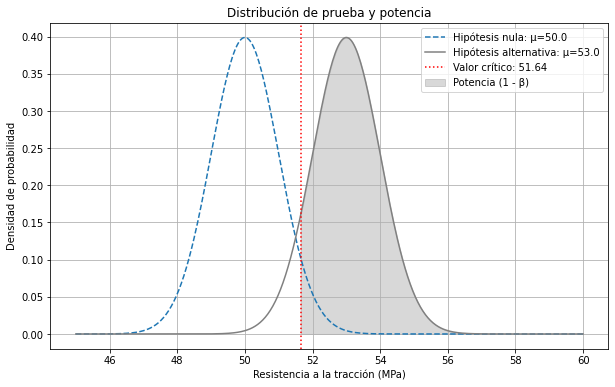

In [154]:
# Crear el gráfico
x = np.linspace(45, 60, 400)
null_dist = stats.norm.pdf(x, mu_0, sigma / np.sqrt(n))
alternative_dist = stats.norm.pdf(x, mu_1, sigma / np.sqrt(n))

# Calcular el valor crítico
critical_value = mu_0 + z_alpha * SE

# Rellenar la región de detección
beta_area_x = np.linspace(critical_value, x[-1], 400)
beta_area_y = stats.norm.pdf(beta_area_x, mu_1, sigma / np.sqrt(n))

plt.figure(figsize=(10, 6))
plt.plot(x, null_dist, label='Hipótesis nula: μ=50.0', linestyle='dashed')
plt.plot(x, alternative_dist, color='gray',label='Hipótesis alternativa: μ=53.0', linestyle='solid')
plt.axvline(critical_value, color='red', linestyle='dotted', label=f'Valor crítico: {critical_value:.2f}')
plt.fill_between(beta_area_x, 0, beta_area_y, color='gray', alpha=0.3, label='Potencia (1 - β)')
plt.title('Distribución de prueba y potencia')
plt.xlabel('Resistencia a la tracción (MPa)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
# 2. Cálculo del tamaño de muestra necesario para un apotencia de 0.90 cuando la media es 52.0
mu_2 = 52.0
power_target = 0.90

# Búsqueda iterativa del tamaño de la muestra
def find_sample_size(mu_0, mu_2, sigma, alpha, power_target):
    n = 1
    while True:
        standard_error = sigma / np.sqrt(n)
        z_alpha = stats.norm.ppf(1 - alpha)
        z_beta = (mu_0 + z_alpha * standard_error - mu_2) / standard_error
        beta = stats.norm.cdf(z_beta)
        power = 1 - beta
        if power >= power_target:
            return n, power
        n += 1

n_required, final_power = find_sample_size(mu_0, mu_2, sigma, alpha, power_target)

print(f"Tamaño de muestra necesario para una potencia de 0.90 con una media de 52.0: {n_required}")


Tamaño de muestra necesario para una potencia de 0.90 con una media de 52.0: 20


② El tamaño de la muestra (n)

$ n= \bigl( \frac{\sigma}{\mu - \mu_0} \bigr)^2 \{u(2 \alpha) + u(\beta) \}^2 = 19.3 -> 20 $

In [156]:
mu = 50
mu_0 = 52
z_beta = 1.282
z_alpha = 1.645

n = (sigma/(mu -mu_0))**2 * (z_alpha + z_beta)**2
print(f"Tamaño de la muestra (n): {n:.1f}")

Tamaño de la muestra (n): 19.3


### 4. Potencia de la prueba sobre la varianza poblacional
母分散に関する検定の検出力

[Audio_7](https://drive.google.com/file/d/1itk53IUIQKyzMsV8DhzjhS2LrR-rgLVA/view?usp=drive_link)

## 4.3

プラスチック製品Pの延性の母分散は3.0^2であった。ばらつきの低減を狙い、試作品を作成した。以下の設問に答えよ。
1. 試作品１１個の延性を測定した。改善後の母分散が1.5^2(%^2)のときの検出力（１－β）を求めよ。
2. 改善後の母分散が1.8^2(%^2)のとき、検出力（１－β）=0.90以上で検出したいとする。このとき必要な試作品の個数（サンプルサイズの大きさｎ）を求めよ。

La varianza poblacional de la ductilidad del producto de plástico P fue $ 3.0^2  $ (%^2) . Se creó un prototipo con el objetivo de reducir la variabilidad. Responde a las siguientes preguntas:
1. Se midió la ductilidad de 11 prototipos. Calcula la potencia $ (1-\beta) $ cuando la varianza poblacional mejorada es $ 1.5^2 $ (%^2)
2. Si la varianza poblacional mejorada es $ 1.8^2 $ (%^2) y se requiere una potencia $ (1-\beta) \ge 0.90 $ para detectar, ¿cuál es el tamaño de muestra necesario?



①

Sea $ \lambda^2 $ la relación entre la verdadera varianza poblacional $ sigma^2 $ y la varianza poblacional bajo la hipótesis nula $ \sigma_0^2 $.

$ \lambda^2 = \sigma^2 / \sigma_0^2 $

$ \chi_0^2 = \frac{S}{\sigma_0^2} = \frac{S}{\sigma^2} \times (\frac{\sigma^2}{\sigma_0^2}) = \frac{S}{\sigma^2} \times \lambda^2 $

La región de rechazo es:

$ \chi_0^2 \leq \chi^2(n-1, 1-\alpha) $

El poder estadístico $ (1-\beta) $ es la probabilidad de que $ \chi_0^2 $ caiga dentro de la región de rechazo cuando la hipótesis alternativa es verdadera.

$ 1 - \beta = P_r \bigl\{ \frac{S}{\sigma_0^2} \leq \chi^2(n-1, 1 - \alpha) \bigr\} = P_r \bigl\{ \frac{\lambda^2 S}{\sigma^2} \leq \chi^2(n-1, 1 - \alpha) \bigr\} = P_r \bigl\{ \frac{S}{\sigma^2} \leq \frac{\chi^2(n-1, 1 - \alpha)}{\lambda^2} \bigr\} $

Dado que $ S/\sigma^2 $ sigue una distribución $ \chi^2 (\phi) $

$ 1 - \beta = P_r \bigl\{\frac{S}{\sigma^2} \leq \chi^2 (n-1, \beta) \bigr\} $

$ \chi^2 (n -1, \beta)  = \frac{\chi^2 (n-1, 1-\alpha)}{\lambda^2} $

$ \lambda^2 = \frac{\chi^2(n-1, 1-\alpha)}{\chi^2(n-1, \beta)} $

$ \lambda^2 = \frac{\sigma^2}{\sigma_0^2} = 1.5^2 / 3.0^2 = 0.25 $

$ \chi^2(n-1,\beta) = \frac{\chi^2(n-1, 1-\alpha)}{\lambda^2} $

$ \chi^2(10, \beta) = \frac{\chi^2(10,0.95)}{0.25} = \frac{3.94}{0.25}= 15.76 $

$ 0.10 \leq \beta \leq 0.25 $

$ 0.75 \leq (1-\beta) \leq 0.90 $

* La respuesta se presenta en forma de intervalo porque se obtiene a partir de la tabla de chi-cuadrado.


Cómo se calcula el poder estadístico ($ 1 - \beta $):

1. Calcular el valor crítico de chi-cuadrado para determinar la región de rechazo bajo la hipótesis nula (H0) con $ \alpha = 0.05 $.
2. Calcular la probabilidad de que los resultados caigan en esa región de rechazo bajo la hipótesis alternativa (H1).
3. Esa probabilidad es el poder estadístico.

chi2_critical = chi2_critical = stats.chi2.ppf(alpha, df)

beta = 1 - stats.chi2.cdf(chi2_critical, df, scale=sigma1_sq/sigma0_sq)

In [157]:
# Varianza Poblacional (Hipótesis Nula y Hipótesis Alternativa)
sigma0_sq = 3.0**2   # Hipótesis Nula（9.0）
sigma1_sq = 1.5**2   # Hipótesis Alternativa（2.25）

# Tamaño de la muestra
n = 11
df = n - 1  # Nivel de significancia

# Nivel de significancia（unilateral）
alpha = 0.05

# Valor crítico de la región de rechazo（prueba de cola drecha）
chi2_critical = stats.chi2.ppf(alpha, df)

# Estadístico de prueba chi'cuadrado es sigue una distribución:
# (n-1) * S^2 / sigma0^2
# con los siguientes parámetros bajo la hipótesis alternativa
noncentral_stat = (df * sigma1_sq) / sigma0_sq

# La probabilidad de que, bajo H1, el estadístico sea menor o igual al valor critico.（1 - β）
beta = 1 - stats.chi2.cdf(chi2_critical, df, scale=sigma1_sq/sigma0_sq)
power = 1 - beta

#
print(f"Grados de libertad: {df}")
print(f"Valor crítico de la región de rechazo de la hipótesis nula（χ²）: {chi2_critical:.4f}")
print(f"Poder estadístico（1 - β）: {power:.4f}")


Grados de libertad: 10
Valor crítico de la región de rechazo de la hipótesis nula（χ²）: 3.9403
Poder estadístico（1 - β）: 0.8933


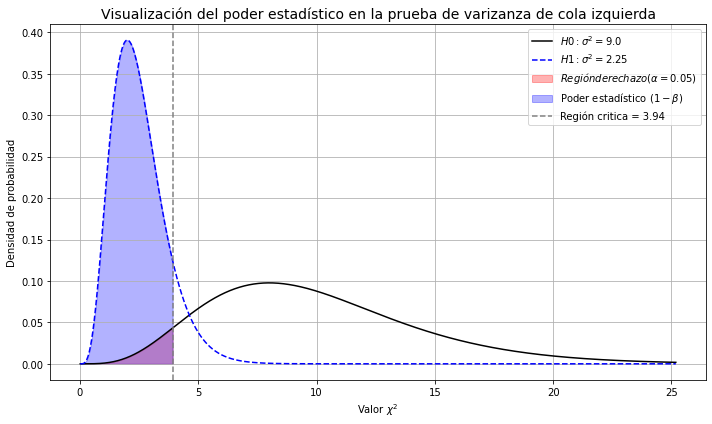

In [158]:
# Configuración de parámetros
n = 11
df = n - 1
sigma0_sq = 3.0**2  # H0
sigma1_sq = 1.5**2  # H1
alpha = 0.05

# Valor crótoco（rechazo de H0 si χ² es pequeño en una prueba de cola izquierda）
critical_value = stats.chi2.ppf(alpha, df)

# Rango del eje X
x = np.linspace(0.01, stats.chi2.ppf(0.995, df), 1000)

# Distribucón χ²（H0とH1）
pdf_H0 = stats.chi2.pdf(x, df)
# Distribución χ² de H1（escalada）
scale_factor = sigma0_sq / sigma1_sq
pdf_H1 = stats.chi2.pdf(x * scale_factor, df) * scale_factor

# Dibujo del gráfico
plt.figure(figsize=(10, 6))

# Distribución de la hipótesis nula
plt.plot(x, pdf_H0, 'k-', label=r'$ H0: \sigma^2 = 9.0 $')
# Distribución de la hipótesis alternativa
plt.plot(x, pdf_H1, 'b--', label=r'$ H1: \sigma^2 = 2.25 $')

# Relleno de la región de rechazo
x_fill = x[x <= critical_value]
plt.fill_between(x_fill, 0, stats.chi2.pdf(x_fill, df), color='red', alpha=0.3, label=r'$ Región de rechazo(\alpha = 0.05) $')

# Relleno del poder estadístico
plt.fill_between(x_fill,
                 0,
                 stats.chi2.pdf(x_fill * scale_factor, df) * scale_factor,
                 color='blue', alpha=0.3, label=r'Poder estadístico $ (1 - \beta) $')

# 臨界値の線
plt.axvline(x=critical_value, color='gray', linestyle='--', label=f'Región critica = {critical_value:.2f}')

# ラベルなど
plt.title('Visualización del poder estadístico en la prueba de varizanza de cola izquierda', fontsize=14)
plt.xlabel(r'Valor $ \chi^2 $')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Se desea detectar la varianza de la población mejorada, con un valor $ \sigma^2 = 1.8^2 $, y una potencia estadística ($ 1 - \beta $) de 0.90 o superior. Se busca el tamaño de muestra $ n $ necesario para este propósito.

In [159]:
# パラメータ設定
sigma0_sq = 3.0**2     # H0: σ² = 9.0
sigma1_sq = 1.8**2     # H1: σ² = 3.24
alpha = 0.05
target_power = 0.90

def find_sample_size(sigma0_sq, sigma1_sq, alpha, target_power):
    for n in range(2, 100):  # n = 2 から探索
        df = n - 1
        # χ²の臨界値（左片側検定なので左5%点）
        chi2_crit = stats.chi2.ppf(alpha, df)
        # 対立仮説の下での χ²統計量（分散の比を使う）
        chi2_obs = df * sigma1_sq / sigma0_sq
        # 検出力：H1の下で χ²_obs ≤ χ²_crit となる確率
        power = stats.chi2.cdf(chi2_crit, df, loc=0, scale=sigma1_sq / sigma0_sq)
        if power >= target_power:
            return n, power
    return None, None

# 実行
n_required, power_achieved = find_sample_size(sigma0_sq, sigma1_sq, alpha, target_power)

# 結果表示
print(f"必要なサンプルサイズ n: {n_required}")
print(f"検出力（1 - β）: {power_achieved:.4f}")


必要なサンプルサイズ n: 19
検出力（1 - β）: 0.9022


## 04-03 Pruebas y estimaciones basadas en datos de conteo
計数値データに基づく検定と推定

1. Análisis del número y la tasa de productos no conformes (número y tasa de defectuosos)
不適合品数・不適合品率（不良個数・不良率）の解析

* Prueba y estimación de la tasa de productos defectuosos P en una población.
* Prueba y estimación de la diferencia entre las tasas de productos defectuosos $ P_A $ y $ P_B $ en dos poblaciones.

2. Análisis del número de no conformidades(número de defectos)
不適合数（欠点数）の解析

* Prueba y estimación del número de defectos $ \lambda $ en una población.
* Prueba y estimación de la diferencia entre los números de defectos $ \lambda_A $ y $ \lambda_B $ en dos poblaciones.

3. Análisis de datos de frecuencias clasificados por categoría
項目ごとに分類された度数データの解析

* Prueba de bondad de ajuste
* Prueba mediante tabla de contingencia

[Audio_8](https://drive.google.com/file/d/1c1oSU1fIkwsnePRN3aRSTZ9uYHis_tKi/view?usp=drive_link)


4. Prueba de bondad de ajuste

## 4.4
工場の一日ごとのチョコ停回数を１００日間にわたって調査した（表４．８）。チョコ停の回数の分布がポワソン分布に従うかどうか検討せよ。

Se realizó una investigación sobre el número de paradas pequeñas diarias en la fábrica durante 100 días (Tabla 4.8). Se debe examinar si la distribución del número de paradas pequeñas sigue una distribución de Poisson.

In [160]:
import pandas as pd
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet9") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df = df.T
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.set_index(df.columns[0])

print(df.T)
df.T.to_excel("Data_1/Tabla_4_8.xlsx")

df = df.reset_index(drop=True)
df.columns = ["s","d"]
df[["s","d"]] = df[["s","d"]].apply(pd.to_numeric)

data = df.copy()

                  Número de paradas pequñas               
0                                                         
Número de paradas                         0   1   2   3  4
Día                                      10  20  30  40  0


Paso1: Establecimiento de la hipótesis

$ H_0 $ : El número de paros cortos por día sigue una distribución de Poiisson.

$ H_1 $ : El número de paros cortos por unidad de tiempo no sigue una distribución de Poisson.

Paso 2: Establecimiento del nivel de significancia y la región de rechazo

$ \alpha = 0.05 $

$ R: \chi_0^2 \geq \chi^2 (\phi: \alpha) $

$ \phi = k - p - 1 = 3 $

Paso 3: Cálculo de las frecuencias esperadas y del estadístico de prueba.



In [161]:
import scipy.stats as stats

ram = np.sum(df['d']*df['s'])/np.sum(df['d'])

df["Poisson"] = stats.poisson.pmf(df["s"],ram)
df.loc[4,"Poisson"] = 1 - df["Poisson"].iloc[0:4].sum()
df["ti"] = (df["Poisson"]*np.sum(df['d'])).round(2)
df["(xi-ti)^2/ti"] = ((df["d"]-df["ti"])**2)/df["ti"]
df.loc["Total"] = df.sum()
df

,s,d,Poisson,ti,(xi-ti)^2/ti
0,0.0,10.0,0.135335,13.53,0.920983
1,1.0,20.0,0.270671,27.07,1.846505
2,2.0,30.0,0.270671,27.07,0.317137
3,3.0,40.0,0.180447,18.04,26.731796
4,4.0,0.0,0.142877,14.29,14.290000
Total,10.0,100.0,1.000000,100.00,44.106421


In [162]:
# Poisson distribution: lambda=2
# Compute PMF for x=0..6 and the probability P(X >= 4) = 1 - P(X <= 3)
import math
from math import factorial, exp

lam = 2.0

def poisson_pmf(k, lam=lam):
    return (lam**k) * exp(-lam) / math.factorial(k)

pmf_values = [(k, poisson_pmf(k)) for k in range(0, 11)]
cum_le_3 = sum(p for k,p in pmf_values if k <= 3)
prob_ge_4 = 1 - cum_le_3

# Display results nicely
print(f"Poisson distribution with λ = {lam}\n")
print("k\tPMF P(X=k)")
for k, p in pmf_values[:8]:
    print(f"{k}\t{p:.8f}")
print("\nP(X >= 4) = 1 - P(X <= 3)")
print(f"P(X <= 3) = {cum_le_3:.8f}")
print(f"P(X >= 4) = {prob_ge_4:.8f}")

# Also show a short program that the user can copy-paste
example_code = '''
# Example: compute P(X >= 4) for Poisson(lambda=2)
import math
def poisson_pmf(k, lam=2):
    return (lam**k) * math.exp(-lam) / math.factorial(k)

# cumulative P(X <= 3)
p_le_3 = sum(poisson_pmf(k, lam=2) for k in range(0,4))
p_ge_4 = 1 - p_le_3
print("P(X >= 4) =", p_ge_4)
'''
print("\nCopy-paste ready example:\n" + example_code)


Poisson distribution with λ = 2.0

k	PMF P(X=k)
0	0.13533528
1	0.27067057
2	0.27067057
3	0.18044704
4	0.09022352
5	0.03608941
6	0.01202980
7	0.00343709

P(X >= 4) = 1 - P(X <= 3)
P(X <= 3) = 0.85712346
P(X >= 4) = 0.14287654

Copy-paste ready example:

# Example: compute P(X >= 4) for Poisson(lambda=2)
import math
def poisson_pmf(k, lam=2):
    return (lam**k) * math.exp(-lam) / math.factorial(k)

# cumulative P(X <= 3)
p_le_3 = sum(poisson_pmf(k, lam=2) for k in range(0,4))
p_ge_4 = 1 - p_le_3
print("P(X >= 4) =", p_ge_4)



Paso 4: Determinación y conclusión

$ \chi_0^2 = 45.82 > \chi^2(3,0.05) = 7.81 $

La hipótesis nula fue rechazada y resultó significativa. Es decir, se puede afirmar que el número de paros cortos por día no sigue una distribución de Poisson.

In [163]:
# Definición de los datos
data = data

# Obtención de las veces de paradas menores y su frecuencia
choco_counts = data['s']
frequency = data['d']

# Cálculo de la tasa de ocurrencia media（lambda）
total_days = sum(frequency)
mean_lambda = sum([choco_counts[i] * frequency[i] for i in range(len(choco_counts))]) / total_days

# Cálculo del valor esperado según la distribución de Poisson
# Ajuste del total correspondiente a la parte de 4 o más
expected_counts = [stats.poisson.pmf(k, mean_lambda) * total_days for k in range(max(choco_counts))]
expected_counts.append(total_days - sum(expected_counts))

# Visualización de los valores observados y esperados
print("\nValores observados:", frequency)
print("Valores esperados:", [round(e, 2) for e in expected_counts])

# Realización de la prueba de chi-cuadrado
chi2_stat, p_value = stats.chisquare(f_obs=frequency, f_exp=expected_counts)

# Visualización de los resultados
print("\nEstadístico de prueba chi-cuadrado:", round(chi2_stat, 2))
print("Valor p:", p_value)

if p_value > 0.05:
    print("Estos datos se consideran que siguen una distribución de Poisson")
else:
    print("Estos datos no se consideran que siguen una distribución de Poisson")






Valores observados: 0    10
1    20
2    30
3    40
4     0
Name: d, dtype: int64
Valores esperados: [np.float64(13.53), np.float64(27.07), np.float64(27.07), np.float64(18.04), np.float64(14.29)]

Estadístico de prueba chi-cuadrado: 44.09
Valor p: 6.155486484248077e-09
Estos datos no se consideran que siguen una distribución de Poisson


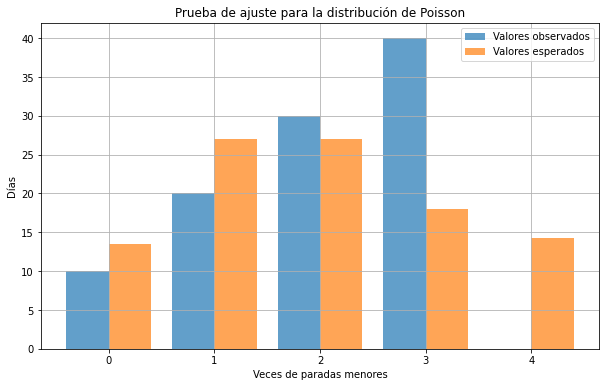

In [164]:
#
plt.figure(figsize=(10, 6))

x = np.array(choco_counts)
plt.bar(x - 0.2, frequency, width=0.4, label='Valores observados', alpha=0.7)
plt.bar(x + 0.2, expected_counts, width=0.4, label='Valores esperados', alpha=0.7)
plt.xlabel('Veces de paradas menores')
plt.ylabel('Días')
plt.xticks(choco_counts)
plt.title('Prueba de ajuste para la distribución de Poisson')
plt.legend()
plt.grid(True)
plt.show()



## Por favor, responda a las preguntas del examen de práctica a través del siguiente enlace.


[Simulacro de examen](https://forms.gle/6JUj9MMogkfLcLG4A)

### 9.1-1

Q社の2つのラインA、Bで製造される特殊繊維の強度の母平均は、$ \mu_A $、$ \mu_B $ である。また、母分散 $ \sigma_A^2 $、$ \sigma_B^2 $ は不明であるが、同程度の値であることが分かっている。2つのラインの特殊繊維の強度に差があるかどうかを検定するため、各ラインからランダムに5つのサンプルを採取した。

* 帰無仮説、
* 対立仮説、
* 検定統計量、
* 棄却域

La media poblacional de la resistencia de la fibra especial producida en las dos líneas A y B de la empresa Q son $ \mu_A $ y $ \mu_B $ respectivamente. Además, aunque las varianzas poblacionales $ \sigma_A^2 $ y $ \sigma_B^2 $ son desconocidas, se sabe que tienen valores similares. Para determinar si hay una diferencia en la resistencia de la fibra especial entre las dos lineas de producción, se tomaron aleatoriamente cinco muestras de cada línea.

Formule lo siguiente:
* Hipótesis nula $ H_0 $
* Hipótesis alternativa $ H_1 $
* Estadístico de prueba
* Región de rechazo

En una prueba bilateral sobre la diferencia de medias poblacionales para dos poblaciones, donde las varianza poblacionales son desconocidas, pero se considera que $ \sigma_A^2 = \sigma_B^2 $.

* Hipótesis nula
  * $ H_0: \mu_A = \mu_B $

* Hipótesis alternativa
  * $ H_1: \mu_A \neq \mu_B$

In [165]:
# Generación de datos de muestra
np.random.seed(0)
n = 5  # Número de muestras de cada línea
line_A = np.round(np.random.normal(loc=50, scale=10, size=n),1)  # Datos de resistencia de la Línea A
line_B = np.round(np.random.normal(loc=55, scale=10, size=n),1)  # Datos de resistencia de la Línea B
df = pd.DataFrame({'Linea A': line_A, 'Linea B': line_B})

mean_raw = df.mean()
var_raw = df.var(ddof=1)

df_with_stats = pd.concat([df, pd.DataFrame([mean_raw.rename('Media'), var_raw.rename('Var')])])
print("Datos de muestra")
df_with_stats

Datos de muestra


,Linea A,Linea B
0,67.6,45.200
1,54.0,64.500
2,59.8,53.500
3,72.4,54.000
4,68.7,59.100
Media,64.5,55.260
Var,55.5,51.503


* Estadistico de prueba
  * $ t_0 = (\bar{x}_A - \bar{x}_B )/ \sqrt{V(1/n_A + 1/n_B)}$

In [166]:
# Cálculo del estadístico de prueba
mean_A = np.mean(line_A)
mean_B = np.mean(line_B)
var_A = np.var(line_A, ddof=1)  # Varianza insesgada
var_B = np.var(line_B, ddof=1)  # Varianza insesgada

t_statistic = (mean_A - mean_B) / np.sqrt(var_A / n + var_B / n)

print(f"Estadístico de prueba t: {t_statistic:.3f}")

df = 2 * n - 2  # Grados de libertad

# Cálculo de valor p（Prueba unilateral）
p_value = 1 - stats.t.cdf(t_statistic, df)

print(f"Valor p: {p_value:.4f}")

Estadístico de prueba t: 1.997
Valor p: 0.0404


* Región de rechazo
  * $ |t_0| \geq t(n_A + n_B -2, \alpha) = t(8,0.05) = 2.306 $

In [167]:
# Cálculo de los grados de libertad
df = 2 * n - 2

# Establecimiento del nivel de significación
alpha = 0.05

# Valor critico de la distribución t
t_critical = np.round(stats.t.ppf(1 - alpha / 2, df),3)  # Prueba bilateral

print(f"Grados de libertad: {df}")
print(f"Valor crítico de la región de rechazo: {t_critical}")

# Determinación del resultado
if t_statistic < -t_critical or t_statistic > t_critical:
    print("Dado que cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
else:
    print("Dado que no cae dentro de la región de rechazo, no se puede rechazar la hipótesis nula.")

Grados de libertad: 8
Valor crítico de la región de rechazo: 2.306
Dado que no cae dentro de la región de rechazo, no se puede rechazar la hipótesis nula.


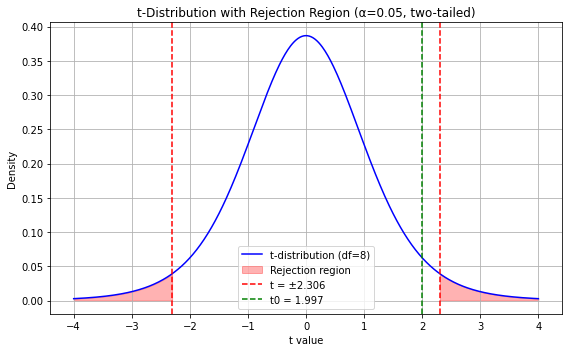

In [168]:
# Parámetros
df = 8  # Grados de libertad
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

# Rango del eje x
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)

# Crear un gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"t-distribution (df={df})", color='blue')

# Pintar el área de rechazo en ambos lados
x_fill_right = np.linspace(t_critical, 4, 200)
x_fill_left = np.linspace(-4, -t_critical, 200)
plt.fill_between(x_fill_right, stats.t.pdf(x_fill_right, df), color='red', alpha=0.3, label='Rejection region')
plt.fill_between(x_fill_left, stats.t.pdf(x_fill_left, df), color='red', alpha=0.3)

# Dibjar la línea del valor crítico
plt.axvline(t_critical, color='red', linestyle='--', label=f't = ±{t_critical:.3f}')
plt.axvline(-t_critical, color='red', linestyle='--')

# Dibujar la línea del estadístico de prueba
plt.axvline(t_statistic, color='green', linestyle='--', label=f't0 = {t_statistic:.3f}')

plt.title('t-Distribution with Rejection Region (α=0.05, two-tailed)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 9.1-2
R社の2工場（A工場、B工場）で製造される金属材料の延性の母平均は $ \mu_A $、$ \mu_B $ である。母分散 $ \sigma_A^2 $、$ \sigma_B^2 $ に関する情報は十分でなく、両工場の製造工程が異なるため、ばらつきには差があると考えられる。A工場の延性の母平均が大きいかどうか検定するため、各上場からランダムにサンプルを採取した。

* 帰無仮説
* 対立検定
* 検定推定量


En la empresa R, el promedio poblacional de ductilidad de los materiales metálicos fabricados en las dos plantas (Planta A y Planta B) se denota como $ \mu_A $ y $ \mu_B $, respectivamente. No se dispone de suficiente información sobre las varianzas poblacionales $ \sigma_A^2 $ y $ \sigma_B^2 $, y dado que los procesos de fabricación en ambas plantas son diferentes, se considera que puede haber diferencia en la variabilidad. Para determinar si el promedio poblacional de ductilidad en la Planta A es mayor, se tomaron muestras aleatorias de cada planta y se realizó una prueba de hipótesis.

* Hipótesis nula H0
* Hipótesis alternativa H1
* Estadístico de prueba

Es el caso de una prueba unilateral sobre la diferencia de medias poblacionales para dos poblaciones, donde las varianzas poblacionales son desconocidas,pero se considera que $ \sigma_A \neq \sigma_B $.

* Hipótesis nula
  * $ H_0: \mu_A = \mu_B $

* Hipótesis alternativa
  * $ H_1: \mu_A > \mu_B$

In [169]:
# Datos de muestra de la fábrica A y la fábrica B
np.random.seed(0)  #
n_A = 10  # Tamaño de muestra de la fábrica A
n_B = 12  # Tamaño de muestra de la fábrica B

# Dadtos de muestra de la fábrica A y la fábrica B
# (suponiendo que siguen una distribución normal)
mu_A, sigma_A = 50, 5  # Media poblacional y desviación estándar de la fábrica A
mu_B, sigma_B = 45, 7  # Media poblacional y desviación estándar de la fábrica B
samples_A = np.round(np.random.normal(mu_A, sigma_A, n_A),1)
samples_B = np.round(np.random.normal(mu_B, sigma_B, n_B),1)

# Visualización de los datos de muestra
print("Datos de muestra de la fábrica A:", samples_A)
print("Datos de muestra de la fábrica B:", samples_B)


Datos de muestra de la fábrica A: [58.8 52.  54.9 61.2 59.3 45.1 54.8 49.2 49.5 52.1]
Datos de muestra de la fábrica B: [46.  55.2 50.3 45.9 48.1 47.3 55.5 43.6 47.2 39.  27.1 49.6]


In [170]:
# Calcular la media y la varianza de la muestra de cada fábrica
mean_A = np.mean(samples_A)
mean_B = np.mean(samples_B)
var_A = np.var(samples_A, ddof=1)  # Varianza muestral
var_B = np.var(samples_B, ddof=1)  # Varianza muestral

print(f"\nMedia muestral de la fábrica A: {mean_A:.2f}")
print(f"Media muestral de la fábrica B: {mean_B:.2f}")
print(f"Varianza muestral de la fábrica A: {var_A:.2f}")
print(f"Varianza muestral de la fábrica B: {var_B:.2f}")



Media muestral de la fábrica A: 53.69
Media muestral de la fábrica B: 46.23
Varianza muestral de la fábrica A: 25.95
Varianza muestral de la fábrica B: 56.84


* Estadístico de prueba
  * $ t_0 = (\bar{x}_A - \bar{x}_B )/ \sqrt{(V_A/n_A + V_B/n_B)}$

* Región de rechazo
  * $ t_0 \geq t(\phi^*, 2\alpha) = t(\phi^*,0.10) $

Este es un método de prueba aproximado por la distribución $ t $, conocido como la **prueba de Welch**.

Los **grados de libertad equivalentes** ($ \phi^* $) se determinan mediante el **método de Satterthwaite**.

$  (V_A/n_A + V_B/n_B)^2 / \phi^* = (V_A/n_A)^2/\phi_A + (V_B/n_B)^2/\phi_B $

In [171]:
# Cálculo de la estadística de prueba de Welch
t_statistic = (mean_A - mean_B) / np.sqrt(var_A/n_A + var_B/n_B)

# Cálculo de los grados de libertad (método de Satterthwaite)
df_numerator = (var_A/n_A + var_B/n_B)**2
df_denominator = ((var_A/n_A)**2 / (n_A - 1)) + ((var_B/n_B)**2 / (n_B - 1))
df_equivalent = df_numerator / df_denominator

# Establecimiento de la región de rechazo
alpha = 0.05  # Nivel de significación
t_critical = stats.t.ppf(1 - alpha, df_equivalent)  # Valor crítico para la prueba unilateral

# Cálculo de valor p（Prueba unilateral）
p_value = 1 - stats.t.cdf(t_statistic, df_equivalent)

# Presentación de los resultados
print(f"\nEstadística de prueba t: {t_statistic:.3f}")
print(f"Grados de libertad equivalentes: {df_equivalent:.3f}")
print(f"Valor crítico de la región de rechazo: {t_critical:.3f}")
print(f"Valor p: {p_value:.4f}")

#
if t_statistic > t_critical:
    print("\nComo el valor cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
    print("La media poblacional de la ductilidad de la fábrica A es meyor que la de la fábrica B.")
else:
    print("\nComo el valor no cae dentro de la región de rechazo la hipótesis nula.")
    print("No se puede afirmar que la media poblacional de la ductilidad de la fábrica A sea mayor que la de la fábrica B.")



Estadística de prueba t: 2.754
Grados de libertad equivalentes: 19.282
Valor crítico de la región de rechazo: 1.728
Valor p: 0.0063

Como el valor cae dentro de la región de rechazo, se rechaza la hipótesis nula.
La media poblacional de la ductilidad de la fábrica A es meyor que la de la fábrica B.


### 9.1-3
 S社では、金属の熱処理を２つの炉（A炉、B炉）で実施している。５ロットの材料をそれぞれ半分ずつに分け、２つの炉で熱処理を行った。炉による熱処理の特性値の母平均の差 $ \hat{\sigma} (= \mu_A - \mu_B) $が０であるかどうかを検定するため、各炉からサンプルを採取した。

* 帰無仮説、
* 対立仮説、
* 検定統計量、
* 棄却域


En la empresa S, el tratamiento térmico de metales se lleva a cabo en dos hornos (Horno A y Horno B). Cinco lotes de material se dividieron por la mitad, y cada mitad se sometió a tratamiento térmico en uno de los hornos. Se tomaron muestras de cada horno para determinar si la diferencia en las medias poblacionales de los valores característicos del tratamiento térmico entre los hornos, $ \hat{\sigma} (= \mu_A - \mu_B) $, es cero.

Formule lo siguiente:
* Hipótesis nula $ H_0 $
* Hipótesis alternativa $ H_1 $
* Estadístico de prueba
* Región de rechazo

Aunque aparentemente se dirigen a dos poblaciones, las mediciones individuales están influenciadas por un lote común, resultando en **datos pareados**.

En este caso, se toma la diferencia $ d_i = x_{Ai} - x_{Bi} $, de los datos y se analiza asumiendo que estos  $ d_i $, son datos provenientes una distribución normal $ N (\delta, \sigma_d^2) $

Por lo tanto, se trata de una prueba bilateral sobre la media poblacional de una sola población, donde la varianza poblacional $ \sigma_d^2 $ se considera desconocida.

* Hipótesis nula
  * $ H_0: \delta = 0 $

* Hipótesis alternativa
  * $ H_1: \delta \neq 0 $

In [172]:
# Generación de datos de muestra
np.random.seed(0)
n = 5  # Número de muestras de cada horno

# Generación de datos de valores característicos para los hornos A y B (asumiento que siguen una distribución normal)
# Por ejemplo, asumiendo una media de 65 para el horno A y una media de 60 para el horno B
line_A = np.round(np.random.normal(loc=65, scale=5, size=n),1)  # Datos de los valores característicos del horno A
line_B = np.round(np.random.normal(loc=60, scale=5, size=n),1)  # Datos de los valores característicos del horno B

# Cálculo de las diferencias
d = line_A - line_B

d

array([18.7,  2.2, 10.7, 16.7, 12.2])

* Estadistico de prueba
  * $ t_0 = \bar{d} / \sqrt{V_d / n}$

* Región de rechazo
  * $ |t_0| \geq t(n - 1, \alpha) = t(4,0.05) = 2.776 $

In [173]:
# Media muestral y desviación estándar de la muestra
mean_d = np.mean(d)
sd_d = np.std(d, ddof=1)
n = len(d)

# Cálculo del estadístico de prueba t
t_stat = mean_d / (sd_d / np.sqrt(n))

# Grados de libertad
df = n - 1

# Valor crítico de la prueba bilateral（nivel de significancia del 5%）
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)

# Cálculo del valor p（prueba bilateral）
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Visualización de resultados
print(f"Media muestral de las diferencias: {mean_d:.2f}")
print(f"Desviación estándar muestral de las diferencias: {sd_d:.2f}")
print(f"Estadístico de prueba t: {t_stat:.3f}")
print(f"Grados de libertad: {df}")
print(f"Valor critico de la región de rechazo: ±{critical_value:.3f}")
print(f"Valor p: {p_value:.4f}")

if abs(t_stat) > critical_value:
    print("Dado que cayó dentro de la región de rechazo, se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre la media poblacional del horno A y la media poblacional del horno B")
else:
    print("Dado que no cayó dentro de la región de rechazo, no podemos rechazar la hipótesis nula.")
    print("No se puede afirmar que exista una diferencia significativa entre la media poblacional del horno A y la media poblacional del horno B.")


Media muestral de las diferencias: 12.10
Desviación estándar muestral de las diferencias: 6.42
Estadístico de prueba t: 4.217
Grados de libertad: 4
Valor critico de la región de rechazo: ±2.776
Valor p: 0.0135
Dado que cayó dentro de la región de rechazo, se rechaza la hipótesis nula.
Existe una diferencia significativa entre la media poblacional del horno A y la media poblacional del horno B


### 9.1-4

T社の２つの溶解炉（A炉、B炉）で製造される金属製品の不純物量の母平均は $ \mu_A $、 $ \mu_B $である。また、母分散 $ \sigma_A^2 $、$ \sigma_B^2 $の値は分かっているものとする。
新型であるB炉の不純物量の母平均が低いかどうか検定するため、各炉からランダムに５つのサンプルを採取した。

* 帰無仮説、
* 対立仮説、
* 検定統計量、
* 棄却域

Las medias poblacionales de la cantidad de impurezas en los productos metálicos fabricados en los dos hornos de fusión (Horno A y Horno B) de la empresa T son $ \mu_A $ y $ \mu_B $, respectivamente. Se asume que los valores de las varianzas poblacionales,  $ \sigma_A^2 $、$ \sigma_B^2 $ son conocidos.

Se tomaron aleatoriamente cinco muestras de cada horno para determinar si la media poblacional de la cantidad de impurezas en el Horno B, que es el modelo más nuevo, es menor.

Formule lo siguiente:
* Hipótesis nula $ H_0 $
* Hipótesis alternativa $ H_1 $
* Estadístico de prueba
* Región de rechazo

Es una prueba unilateral sobre la diferencia de medias poblacionales en dos poblaciones, donde se considera que las varianzas poblacionales son conocidas.

* Hipótesis nula
  * $ H_0: \mu_A = \mu_B $

* Hipótesis alternativa
  * $ H_1: \mu_A > \mu_B $

In [174]:
# Generación de datos de muestra
np.random.seed(0)
n = 5  # Número de muestras de caca horno

# Configuración de la varianza poblacional
sigma_squared_A = 4  # Varianza de horno A
sigma_squared_B = 3  # Varianza de horno B

# Generación de datos de valores característicos par alos hornos A y B (asumiendo que siguen una distribución normal)
# Por ejemplo, se establec una media de 10 para el horno A y una media de 8 para el horno B.
line_A = np.round(np.random.normal(loc=10, scale=np.sqrt(sigma_squared_A), size=n),3)  # Datos de impurezas del horno A
line_B = np.round(np.random.normal(loc=8, scale=np.sqrt(sigma_squared_B), size=n),3)  # Datos de impurezas del horno B

print("Datos de muestra del horno A:", line_A)
print("Datos de muestra del horno B:", line_B)

Datos de muestra del horno A: [13.528 10.8   11.957 14.482 13.735]
Datos de muestra del horno B: [6.307 9.646 7.738 7.821 8.711]


* Estadistico de prueba
  * $ u_0 = (\bar{x}_A - \bar{x}_B) / \sqrt{\sigma_A^2 / n_A + \sigma_B^2 / n_B}$

* Región de rechazo
  * $ u_0 \geq u(2\alpha) = u(0.10) = 1.645 $

In [175]:
# Cálculo del estadístico de prueba
mean_A = np.mean(line_A)
mean_B = np.mean(line_B)

# Cálculo del estadístico Z（prueba Z ya que la varianza poblacional es conocida）
z_statistic = (mean_A - mean_B) / np.sqrt(sigma_squared_A / n + sigma_squared_B / n)

# Establecimiento de la región de rechazo
alpha = 0.05  # Nivel de significancia
z_critical = stats.norm.ppf(1 - alpha)  # Valor crítico de la preba unilateral

# Cálculo del valor p（prueba bilateral）
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

#
print(f"Estadístico de prueba Z: {z_statistic:.3f}")
print(f"Valor critico: {z_critical:.3f}")
print(f"Valor p: {p_value:.4f}")

# Determinación de resultados
if z_statistic < z_critical:
    print("Dado que cayó en la región de rechazo, rechazamos la hipótesis nula")
else:
    print("Dado que no cayó en la región de rechazo, no podemos rechazar la hipótesis nula")


Estadístico de prueba Z: 4.104
Valor critico: 1.645
Valor p: 0.0135
Dado que no cayó en la región de rechazo, no podemos rechazar la hipótesis nula


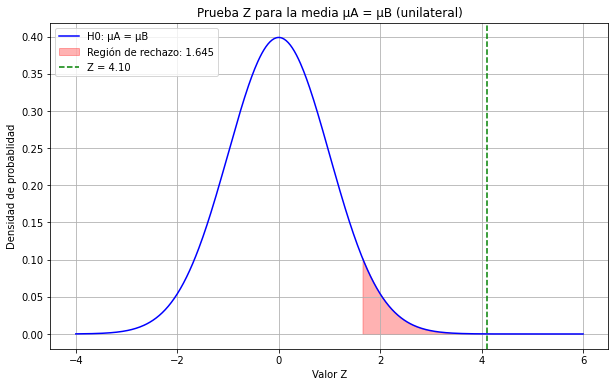

In [176]:
# Configuración del x
x = np.linspace(-4, 6, 500)
null_dist = stats.norm(loc=0, scale=1).pdf(x)

# グラフ描画
plt.figure(figsize=(10, 6))
plt.plot(x, null_dist, label="H0: μA = μB", color="blue")
plt.fill_between(x, 0, null_dist, where=(x >= z_critical), color="red", alpha=0.3, label=f"Región de rechazo: {z_critical:.3f}")
plt.axvline(z_statistic, color='green', linestyle='--', label=f'Z = {z_statistic:.2f}')
plt.title("Prueba Z para la media μA = μB (unilateral)")
plt.xlabel("Valor Z")
plt.ylabel("Densidad de probablidad")
plt.legend()
plt.grid(True)
plt.show()


### 9.1-5

5か所の試験所で、成分Gの分析を行っている。今回、同一サンプルを用いて各試験所で５回の測定を行ったところ、V1～V5の分散が得れれれた。各試験所で測定値のバラつきが一様であるかどうかコクランの検定により検討した。

* 帰無仮説、
* 対立仮説、
* 検定統計量、
* 棄却域

En cinco laboratorios de pruebas diferentes, se analizó el componente G utilizando la misma muestra, se realizaron cinco mediciones en cada laboratorio, obteniéndose las varianzas V1 a V5. Se examinó si la variabilidad de los valores medidos es uniforme en cada laboratorio mediante la prueba de Cochran.

Formule lo siguiente:
* Hipótesis nula $ H_0 $
* Hipótesis alternativa $ H_1 $
* Estadístico de prueba
* Región de rechazo



Para la prueba de homogeneidad de más de tres varianzas poblacionales, se utiliza la prueba de Cochran debido a que el tamaño de la muestra es constante.

* Hipótesis nula
  * $ H_0:$ La variabilidad de los valores medidos en cada laboratorio es uniforme.

* Hipótesis alternativa
  * $ H_1: $ La variabilidad de los valores medidos en cada laboratorio no es uniforme.

In [177]:
# Varianza de los valores medidos en cada laboratorio (usando números aleatrios como ejemplo)
# V1, V2, V3, V4, V5 son los valores de varianza de cada laboratorio, respectivamente
np.random.seed(2)  #
n_labs = 5  # Número de laboratorios
n_samples = 5  # Número de muestras en cada laboratorio

# Ejemplos de valores medidos en cada loboratorio (asumiendo que siguen una distribución normal)
data = [
    np.random.normal(loc=10, scale=1, size=n_samples),  # Laboratorio 1
    np.random.normal(loc=10, scale=2, size=n_samples),  # Laboratorio 2
    np.random.normal(loc=10, scale=1.5, size=n_samples),  # Laboratorio 3
    np.random.normal(loc=10, scale=1.2, size=n_samples),  # Laboratorio 4
    np.random.normal(loc=10, scale=2.5, size=n_samples),  # Laboratorio 5
]

# Calcular la varianza de cada laboratorio
variances = [np.var(d, ddof=1) for d in data]  # Calcular la varianz muestral
variances = np.array(variances)

print("Varianza de cada laboratorio:", variances)

Varianza de cada laboratorio: [2.28023289 1.93564657 3.3955595  0.82417493 1.66745411]


* Estadistico de prueba
  * $ c = V_{max} / \sum V_i$

* Región de rechazo
  * $ R: c \geq (k, \phi : \alpha) = C(5,4,0.05) = 0.506 $

Estadistico de prueba C: 0.336
Grados de libertad del numerador: 54
Grados de libertad del denominador: 3
Valor crítico de la región de rechazo: 0.506
Dado que no cayó en la región de rechazo, no podemos rechazar la hipótesis nula . Todas las varizanzas no iguales.


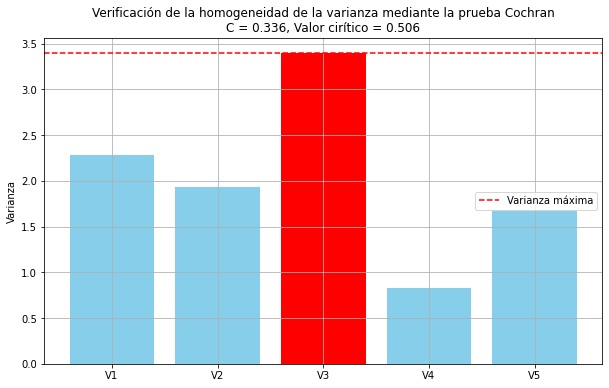

In [178]:
k = len(variances)    # 試験所の数
n = 5

# Cálculo del Cochran's C
C = np.max(variances) / np.sum(variances)

# Calor crítico de Cochran
# 今回は α = 0.05 の場合の近似臨界値（自由度ν=4, k=5）を使います（表から取得 or 近似）
# ここでは近似値を直接書いておきます（例: 0.506）
C_critical = 0.506  # α = 0.05, df = 4, k = 5 の例として

# Visualización de resultados
print(f"Estadistico de prueba C: {C:.3f}")
print(f"Grados de libertad del numerador: {df_numerator:.0f}")
print(f"Grados de libertad del denominador: {df_denominator:.0f}")
print(f"Valor crítico de la región de rechazo: {C_critical:.3f}")

# Determinación de resultados
if C > C_critical:
    print("Dado que cayó en la región de rechazo, rechazamos la hipótesis nula. Todas las varianzas no son iguales.")
else:
    print("Dado que no cayó en la región de rechazo, no podemos rechazar la hipótesis nula . Todas las varizanzas no iguales.")

# Visualización
plt.figure(figsize=(10, 6))
bars = plt.bar([f"V{i+1}" for i in range(k)], variances, color='skyblue')

# La varianza máxima en rojo
max_index = np.argmax(variances)
bars[max_index].set_color('red')

#
plt.axhline(y=np.max(variances), color='red', linestyle='--', label='Varianza máxima')
plt.title(f"Verificación de la homogeneidad de la varianza mediante la prueba Cochran\nC = {C:.3f}, Valor cirítico = {C_critical}")
plt.ylabel("Varianza")
plt.legend()
plt.grid(True)
plt.show()

### 9.2

A社では、高強度の樹脂製品を開発している。従来製品の強度の母平均 $ \mu = 600 $ (MPa)、母標準偏差 $ \sigma = 20 $ (MPa)の正規分布に従っている。

今回、添加成分の見直しにより強度の向上を図った改良品を試作した。
改良後の強度の母平均が、620 (MPa)にできれば、拡販に寄与すると考えられる。

試作品のなかから、n=5 個の製品をランダムにぬきとり、強度の平均値 $ \bar{x} = 613.0 $ (MPa) を求めた。
改良品の強度が向上しているかどうかを仮説検定したい。

なお、改良品の強度も正規分布に従い、その母標準偏差は従来品と変わらないものとする。


En la empresa A, se está desarrollando un producto de resina de alta resistencia. La resistencia del producto convencional sigue una distribución normal con una media poblacional $ \mu = 600 $ (MPa) y una desviación estándar poblacional $ \sigma = 20 $ (MPa).

En esta ocasión, se ha prototipo un producto mejorado buscando aumentar la resistencia mediante la revisión de los componentes aditivos. Se considera que, sí la media poblacional de la resistencia después de la mejora puede ser de 620 (MPa), esto contribuirá a la expansión de las ventas.

De entre los prototipos, se seleccionaron aleatoriamente n=5 productos y se obtuvo una resistencia promedio de $ \bar{x} = 613.0 $ (MPa).

Ahora, queremos realizar una prueba de hipótesis para determinar sí la resistencia del producto mejorado ha aumentado.

Además, se asume que la resistencia del producto mejorado también sigue una distribución normal y que su desviación estándar poblacional no cambia con respecto al producto convencional.


Prueba de Hipótesis pura una Media Poblacional con Varianza Poblacional Conocida

#### 1. Prueba de Hipótesis

Establecimiento de las Hipótesis y Nivel de Significancia

* $ H_0: \mu \geq \mu_0 (=600) $

* $ H_1: \mu > \mu_0 $

* $ \alpha = 0.05 $

Valor medio:

* $ \bar{x} = 613.0 $

Cálculo del estadístico de prueba

* $ u_0 = (\bar{x} -\mu_0) / \sqrt{\sigma^2/n} = 1.453 => 1.45 $

Conclusión:

* $ u_0 < u(0.10) = K_{0.05} = 1.645 $

: **No es significativo** al nivel de significancia del 5%. Por lo tanto, no se puede afirmar que haya un efecto de mejora.

In [179]:
# Configuración de parámetros
mu_0 = 600  # Media poblacional del producto tradicional
sigma = 20  # Desviación estándar poblacional
mu_a = 620  # Media poblacional del producto mejorado
n = 5       # Tamaño de la muestra
Xbar = 613.0  # Media muestral

# Cálculo del estadístico de prueba
se = sigma / np.sqrt(n)
z = (Xbar - mu_0) / se

# Nivel de significancia
alpha = 0.05

# Cálculo de la región de rechazo basada en el valor z
critical_value = stats.norm.ppf(1 - alpha)  # Prueba unilateral
reject_region = critical_value

# Visualización de los resultados de la prueba
print(f"Estadístico de pureba (z): {z:.3f}")
print(f"Límite superior de la región de rechazo (z): {reject_region:.3f}")
if z > reject_region:
    print("Dado que cayó en la región de rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

Estadístico de pureba (z): 1.453
Límite superior de la región de rechazo (z): 1.645
No podemos rechazar la hipótesis nula.


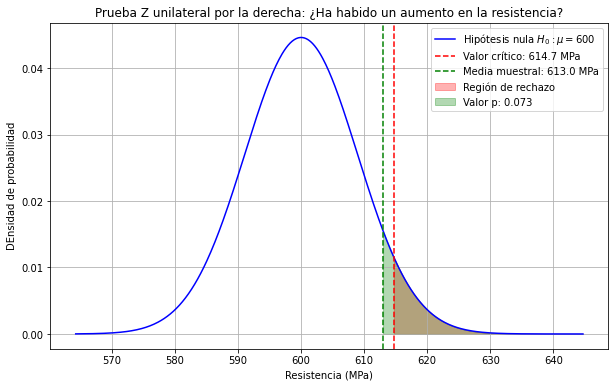

In [180]:
z_crit = critical_value # Estadístico de preba Z
p_value = 1 - stats.norm.cdf(z)

# Rango del eje x
x = np.linspace(mu_0 - 4 * se, mu_0 + 5 * se, 500)
y = stats.norm.pdf(x, mu_0, se)

# Creación de gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Hipótesis nula $H_0: \mu=600$', color='blue')

# Línea del valor crítico
crit_x = mu_0 + z_crit * se
plt.axvline(crit_x, color='red', linestyle='--', label=f'Valor crítico: {crit_x:.1f} MPa')

# Línea de la media muestral
plt.axvline(Xbar, color='green', linestyle='--', label=f'Media muestral: {Xbar} MPa')

# Relleno de la región de rechazo
x_reject = np.linspace(crit_x, mu_0 + 5 * se, 200)
plt.fill_between(x_reject, stats.norm.pdf(x_reject, mu_0, se), color='red', alpha=0.3, label='Región de rechazo')

# Rellenar el área correspondiente al valor p
x_p = np.linspace(Xbar, mu_0 + 5 * se, 200)
plt.fill_between(x_p,stats.norm.pdf(x_p, mu_0, se), color='green', alpha=0.3, label=f'Valor p: {p_value:.3f}')

# Etiquests, titulos, y otros elementos gráficos
plt.title('Prueba Z unilateral por la derecha: ¿Ha habido un aumento en la resistencia?')
plt.xlabel('Resistencia (MPa)')
plt.ylabel('DEnsidad de probabilidad')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#### 2. Análisis de la potencia estadística:

La potencia de la prueba varía según los valores de $ \mu, \sigma $ y n.

En esta prueba, dado que no fue significativa, es necesario considerar si se tuvo suficiente potencia estadística.

Calcular la potencia para un tamaño de $ n= 5 $

El poder estadístico cuando el tamaño de la muestraes n=5: 0.723


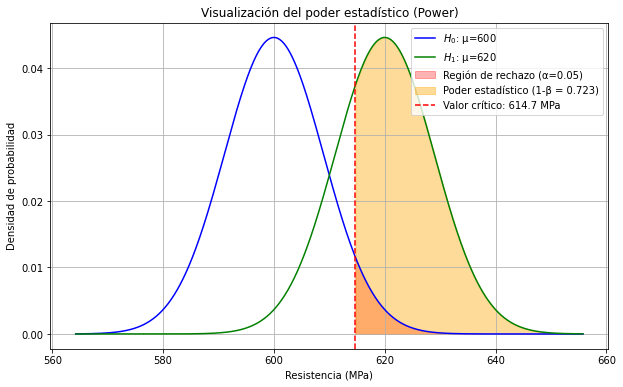

In [181]:
# Parámetros
mu_a = 620          # Media poblacional de la hipótesis alternativa (la resistencia que se desea lograr)

# Valor crítico (prueba de cola drecha)
z_crit = stats.norm.ppf(1 - alpha)
x_crit = mu_0 + z_crit * se

# Configuración del eje X
x = np.linspace(mu_0 - 4*se, mu_a + 4*se, 500)
null_dist = stats.norm.pdf(x, mu_0, se)
alt_dist = stats.norm.pdf(x, mu_a, se)

# Potencia : Probabilidad de que la distribución alternativa esté en el lado derecho (región de rechazo)
beta = stats.norm.cdf(x_crit, loc=mu_a, scale=se)
power = 1 - beta

print(f"El poder estadístico cuando el tamaño de la muestraes n=5: {power:.3f}")

# Creación de gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, null_dist, label='$H_0$: μ=600', color='blue')
plt.plot(x, alt_dist, label='$H_1$: μ=620', color='green')

# Región de rechazo (extremo derecho de la distribución nula)
x_reject = np.linspace(x_crit, x[-1], 200)
plt.fill_between(x_reject, stats.norm.pdf(x_reject, mu_0, se), color='red', alpha=0.3, label='Región de rechazo (α=0.05)')

# Área de la potencia (lado derecho de la distribución aalternativa)
plt.fill_between(x_reject, stats.norm.pdf(x_reject, mu_a, se), color='orange', alpha=0.4, label=f'Poder estadístico (1-β = {power:.3f})')

# Línea del valor crítico
plt.axvline(x_crit, color='red', linestyle='--', label=f'Valor crítico: {x_crit:.1f} MPa')

# Etiqueta
plt.title('Visualización del poder estadístico (Power)')
plt.xlabel('Resistencia (MPa)')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Determinar el tamaño de muestra $ n $ necesario para detectar una media poblacional de la fuerza del producto mejorado de 620 (MPa) con una potencial del $ 1 - \beta = 0.90 $

$ \mu - \mu_0 = K_{\alpha} \sqrt{\sigma^2/n} + K_{\beta} \sqrt{\sigma^2/n} $

$ n = (\sigma/(\mu - \mu_0))^2 \times (K_{\alpha} + K_{\beta})^2 $

In [182]:
# Potencia objetivo
power_target = 0.90

# Cálculo de la región de rechazo
z_alpha = stats.norm.ppf(1 - alpha)  # Valor Z crítico para una prueba unilateral

# Función para calcular el tamaño de muestra requerido
def calculate_sample_size(mu_0, mu_a, sigma, alpha, power_target):
    z_beta = stats.norm.ppf(power_target)  # Valor z critico para un aprueba unilateral
    # Cálculo del tamaño de muestra
    n = ((z_alpha + z_beta) * (sigma / (mu_a - mu_0))) ** 2
    return np.ceil(n)  # Redondear al alza el decimal

# Calcular el tamanño de muestra necesario
required_sample_size = calculate_sample_size(mu_0, mu_a, sigma, alpha, power_target)

# Visualización de los resultados
print(f"Tamaño de muestra necesario para rechazar la hipótesis nula con una potencia de {power_target} : {int(required_sample_size)}")


Tamaño de muestra necesario para rechazar la hipótesis nula con una potencia de 0.9 : 9


## 9.3

D社では、新たに微細穴あけ装置を導入した。本装置で加工した部品の穴の直径を測定したところ次の値が得られた。なお、穴の直径は正規分布に従うものとする。


La empresa D ha introducido recientemente un nuevo equipo de perforación de microagujeros.
Al medir el diámetro de los orificios de las piezas procesadas con este equipo, se obtuvieron los siguientes valores.
Se asume que el diámetro de los orificios sigue una distribución normal.

15, 14, |3, 16, 17 ($ \mu m $)

#### 1. Realizar la estimación de la media poblacional $ \mu $ del diámetro de los orificios.


$ \hat{\mu} = \bar{x} $

$ \mu_U = \bar{x} + t(\phi, \alpha) \sqrt{V/n} $

$ \mu_L = \bar{x} - t(\phi, \alpha) \sqrt{V/n} $

In [183]:
# Data
data = np.array([15, 14, 13, 16, 17])

# Estimación puntual de la media poblacional
mu_hat = np.mean(data)

# Intervalo de confianza del 95% para la media poblacioonal
n = len(data)
alpha = 0.05
t_value = stats.t.ppf(1 - alpha / 2, df=n - 1)
se = np.std(data, ddof=1) / np.sqrt(n)
ci_mu_lower = mu_hat - t_value * se
ci_mu_upper = mu_hat + t_value * se

# Visualización de los resultados
print(f"Estimación puntual de la media poblacional: {mu_hat:.1f}")
print(f"Intervalo de confianza del 95% para la media poblacional: ({ci_mu_lower:.1f}, {ci_mu_upper:.1f})")

Estimación puntual de la media poblacional: 15.0
Intervalo de confianza del 95% para la media poblacional: (13.0, 17.0)


#### 2. Realizar la estimación del la varianza poblacional $ \sigma^2 $ del diámetro de los orificios.

$ \hat{\sigma}^2 = V = S / \phi $

$ \sigma_U^2 = S / \chi^2 (\phi, 1 - \alpha/2) $

$ \sigma_L^2 = S / \chi^2 (\phi, \alpha/2) $

In [184]:
# Estimación puntual de la varianza poblacional
sigma2_hat = np.var(data, ddof=1)  # Varianza insesgada

# Intervalo de confianza del 95% para la varianza poblacional
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
ci_sigma2_lower = (n - 1) * sigma2_hat / chi2_upper
ci_sigma2_upper = (n - 1) * sigma2_hat / chi2_lower

print(f"Estimación puntual de la varianza poblacional: {sigma2_hat:.1f}")
print(f"Intervalo de confianza del 95% para la varianza poblacional: ({ci_sigma2_lower:.1f}, {ci_sigma2_upper:.1f})")


Estimación puntual de la varianza poblacional: 2.5
Intervalo de confianza del 95% para la varianza poblacional: (0.9, 20.6)


## 9.4-1

A社では、鋼板の表面処理を行っている。表面の気泡状の欠陥が問題となっており、工程の改善を行った。従来は１㎡あたり１８個の欠陥が発生していたが、改善後１０平方メートル分の鋼板を採取し検査したところ、１０個の欠陥が見つかった。改善の効果があったかどうか検討したい。

ポワソン分布の直接正規分布近似法を用いる。

La empresa A se dedica al tratamiento superficial de chapas de acero.
Los defectos en forma de burbujas en la superficie han sido un problema y se ha implementado una mejora en el proceso.
Anteriormente, se producían 18 defectos por metro cuadrado.
Sin embargo, después de la mejora, se tomaron y examinaron 10 metros cuadrados de chapa de acero, encontrando 10 defectos.
Se desea investigar si la mejora ha sido efectiva.

Se utiliza el método de aproximación normal directa para la distribución de Poisson.

Establecimiento de las hipótesis:

* $ H_0: \lambda = \lambda_0 (= 1.8) $

* $ H_1: \lambda < \lambda_0 $


Nivel de significancia

* $ \alpha = 0.05 $

Región de rechazo

* $ R: u_0 \leq -u(0.10) = -1.645  $

Cálculo del estadístico de prueba

* $ \hat{\lambda} = T/n $

* $ u_0 = (\hat{\lambda} - \lambda_0) / \sqrt{\lambda_0/n} = -1.886 $

Juicio y Conclusión

* $ u_0 = -1.886 < -u(0.10) = -1.645 $



In [185]:
# Valores conocidos
lambda_0 = 1.8  # Número de defectos poblacional anterior
n = 10          # Área inspeccionada
k = 10          # Número de defectos encontradoss

# Nivel de significancia
alpha = 0.05

# Cálculo del estadístico de prueba （aproximando la media de la distribución de Poisson con la distribución normal）
lambda_hat = k / n  # Número de defectos estimado
z = (lambda_hat - lambda_0) / np.sqrt(lambda_0 / n)

# Cálculo del puntaje Z y el valor p
p_value = stats.norm.cdf(z)

# Vusualización de los resultados
print(f"Región de rechaza: {- z_alpha:.3f}")
print(f"Puntaje Z: {z:.3f}")
print(f"Valor p: {p_value:.4f}")

# Cálculo de la región de rechazo
z_alpha = stats.norm.ppf(1 - alpha)

# Conclusión
if z < z_alpha:
    print("Rechazamos la hipótesis nula: Se considera que hay un efecto de mejora.")
else:
    print("No podemos rechazar la hipótesis nula: No se puede afirmar que haya un efecto de mejora.")

Región de rechaza: -1.645
Puntaje Z: -1.886
Valor p: 0.0297
Rechazamos la hipótesis nula: Se considera que hay un efecto de mejora.


Estimación del número de defectos poblacional

$ \hat{\lambda} = T / n $

Estimación por intervalo (con un nivel de confianza del 95%)

$ \lambda_U = \hat{\lambda} + u(\alpha) \sqrt{\hat{\lambda}/n } $

$ \lambda_L = \hat{\lambda} - u(\alpha) \sqrt{\hat{\lambda}/n } $

In [186]:
# 母欠点数の推定
# Estimación del número de defectos poblacional
print(f"Estimación puntual λ̂: {lambda_hat:.2f}")

# Estimación por intervalo (con un nivel de confianza del 95%)
ci_lower = lambda_hat - stats.norm.ppf(1 - alpha / 2) * np.sqrt(lambda_hat / n)
ci_upper = lambda_hat + stats.norm.ppf(1 - alpha / 2) * np.sqrt(lambda_hat / n)

print(f"Intervalo de confianza del 95%: ({ci_lower:.3f}, {ci_upper:.3f})")

Estimación puntual λ̂: 1.00
Intervalo de confianza del 95%: (0.380, 1.620)


In [187]:
# Valores conocidos
lambda_before = 1.8  # Número de defectos antes de la mejora (por metro cuadrado)
area = 10  # Área inspeccionada (por metro cuadrado)
observed_defects = 10  # Número de defectos observados después de la mejora

# Número esperado de defectos antes de la mejora
expected_defects_before = lambda_before * area

# Prueba de hipótesis
alpha = 0.05  # Nivel de significancia
p_value = stats.poisson.cdf(observed_defects, expected_defects_before)

# Cálculo de la región de rechazo (cálculo del valor crítico inferior de la distribución de Poisson)
critical_value = stats.poisson.ppf(alpha, expected_defects_before)

# Decisión de la región de rechazo
reject_null = p_value < alpha

# Estimación del número de defectos poblacional
# Estimación puntual
point_estimate = observed_defects / area

# Estimación por intervalo (intervalo de confianza del 95%)
# Calcular el intervalo de confianza de la distribución de Poisson
lower_bound = stats.poisson.ppf(0.025, observed_defects)
upper_bound = stats.poisson.ppf(0.975, observed_defects)

# Visualización de resultados
print(f"Valor crítico de la región de rechazo: {critical_value}")
print(f"¿Rechazar la hipótesis nula?: {'Rechazar' if reject_null else 'No rechazar'}")
print(f"Valor p: {p_value:.4f}")
print(f"Estimación puntual (Número de defectos poblacional): {point_estimate:.4f}")
print(f"Intervalo de confianza del 95%: ({lower_bound/area:.4f}, {upper_bound/area:.4f})")


Valor crítico de la región de rechazo: 11.0
¿Rechazar la hipótesis nula?: Rechazar
Valor p: 0.0304
Estimación puntual (Número de defectos poblacional): 1.0000
Intervalo de confianza del 95%: (0.4000, 1.7000)


## 9.4-2

B社では、薬品用ボトルの生産を行っている。今回コストダウンのため製造工程をみなおした。
従来の母不適合品率は０．０５であったが、工程変更後の製品からランダムに５００個採取し検査したところ、不適合品は３０個あった。工程変更後の母不適合品率に差がないかどうか件としたい。

なお、二項分布の直接正規分布近似法を用いるものとする。

La empresa B produce botellas para productos farmacéuticos.
Recientemente, han revisado su proceso de fabricación para reducir costos.

Anteriormente, la proporción de artículos defectuosos poblacional era de 0.05. Sin embargo, después del cambio en el proceso, se tomaron aleatoriamente 500 botellas del producto y , al inspeccionarlas, se encontraron 30 artículos defectuosos. Se desea investigar si hay una diferencia en la proporción de artículos defectuosos poblacional después del cambio en el proceso.

Se utilizará el método de aproximación normal directa para la distribución binomial.

Establecimiento de las hipótesis:

* $ H_0: P = P_0 (=0.05) $

* $ H_1: P \neq P_0 $

Nivel de significancia

* $ \alpha = 0.05 $

Región de rechazo

* $ R: |u_0| \geq -u(0.05) = 1.960 $

Cálculo del estadístico de prueba

* $ \hat{P} = p = x/n  $

* $ u_0 = (p - P_0) / \sqrt{P_0(1 - P_0)/n} = 1.03 $

Juicio y Conclusión

* $ |u_0| = 1.03 < -u(0.05) = 1.960 $


In [188]:
# Data
n = 500  # Tamaño de la muestra
p0 = 0.05  # Propourcioón de artículos defectuosos poblacional hipotetizada（proporción de defectos convencional）
x = 30  # Número de artículos defectuosos
alpha = 0.05  # Nivel de significancia

# 1. Estimación puntual (de la proporción de articulos defectuosos)
p_hat = x / n

# 2. Error estándar para la prueba de hipóteis (aproximación a la distribución normal)
se = np.sqrt(p0 * (1 - p0) / n)

# 3. Estadístico de prueba (Valor Z)
z = (p_hat - p0) / se

# 4. Nivel de significancia y región de rechazo
z_critical = stats.norm.ppf(1 - alpha / 2)  # Prueba bilateral

# 5. Conclusión
if abs(z) > z_critical:
    conclusion = "Rechazamos la hipótesis nula (se considera que hay una diferencía en la proporción de artículos defectuosos)"
else:
    conclusion = "No podemos rechazar la hipótesis nula (se considera que no hay diferencia en la proporción de artículos defectuosos.)"

# 結果の表示
print(f"Estacístico de prueba (Valor Z): {z:.2f}")
print(f"Nivel de significancia: {alpha}")
print(f"Valor crítico de la región de rechazo (Z_critical): {z_critical:.3f}")
print(f"Conclusión: {conclusion}")

Estacístico de prueba (Valor Z): 1.03
Nivel de significancia: 0.05
Valor crítico de la región de rechazo (Z_critical): 1.960
Conclusión: No podemos rechazar la hipótesis nula (se considera que no hay diferencia en la proporción de artículos defectuosos.)



Estimación del número de defectos poblacional

$ \hat{P} = p = x / n $

Estimación por intervalo (con un nivel de confianza del 95%

$ P_U = p + u(\alpha) \sqrt{P(1-P)/n}$

$ P_L = p - u(\alpha) \sqrt{P(1-P)/n}$

In [189]:
print(f"Estimación puntual (de la proporción de artículos defectuosos): {p_hat:.2f}")

# 6. Intervalo de confianza（95%）
se_p_hat = np.sqrt(p_hat * (1 - p_hat) / n)
ci_lower = p_hat - z_critical * se_p_hat
ci_upper = p_hat + z_critical * se_p_hat

print(f"Intervalo de confianza del 95%: ({ci_lower:.4f}, {ci_upper:.4f})")

Estimación puntual (de la proporción de artículos defectuosos): 0.06
Intervalo de confianza del 95%: (0.0392, 0.0808)


## 9.4-3

A、B２つのラインで製造される同仕様のプラスチック製品について調査したところ、表９．１の結果を得た。

ラインによって適合品・不適合品の出方に違いがあるかどうか検討したい。

Se investigaron productos plásticos de la misma especificación fabricados en las líneas de producción A y B, obteniéndose los resultados mostrados en la Tabla 9.1.

Se desea investigar si existe una diferencia en la aparición de productos conformes y no conformes entre las líneas.

In [190]:
data = np.array([[180, 20], [140, 60]])
df = pd.DataFrame(data, index=['Linea A', 'Linea B'], columns=['Conforme', 'No Conforme'])
df['Total'] = df.sum(axis=1)
df.loc['Total'] = df.sum(axis=0)

print("Tabla 9.1")
df

Tabla 9.1


,Conforme,No Conforme,Total
Linea A,180,20,200
Linea B,140,60,200
Total,320,80,400


Establecimiento de la Hipótesis:

* $ H_0 $ : No hay diferencia en la aparición de productos conformes y no conformes entre las líneas.

* $ H_1 $: Hay una diferencia en la aparición de productos conformes y no conformes entre las líneas.

Nivel de significancia

* $ \alpha = 0.05 $

* $ \phi = (l-1)(m-1) $

Región de rechazo

* $ R: \chi_0^2 \geq \chi^2 (1, 0.05) = 3.84 $

Cálculo del estadístico de prueba

* $ \chi_0^2 = \sum_{i=1}^2 \sum_{j=1}^2 (x_{ij} - t_{ij})^2 /t_{ij} = 25.0 $

Juicio y Conclusión

* $ \chi_0^2 = 25.0 > \chi^2 (1, 0.05) = 3.84 $


In [191]:
# Definición de los datos
observed = data  # Frecuencia observada
total_A = np.sum(observed[0])  # Total de la línea A
total_B = np.sum(observed[1])  # Total de la línea B
total = np.sum(observed)  # Total

# Cálculo de la frecuencia esperada
expected = np.zeros_like(observed)

# Calcular las frecuencias esperadas de productos conformes y no conformes para cada línea
for i in range(observed.shape[0]):  # Fila (línea)
    for j in range(observed.shape[1]):  # Columna （conforme / no conforme）
        expected[i, j] = (np.sum(observed[:, j]) * total_A) / total

# Cálculo del valor χ²
chi_squared = np.sum((observed - expected) ** 2 / expected)

# Cálculo de los grados de libertad
degrees_of_freedom = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# Cálculo del valor p
p_value = 1 - stats.chi2.cdf(chi_squared, degrees_of_freedom)

# 結果の表示
print(f"Frecuencia observada:\n{observed}")
print(f"Frecuencia esperada:\n{expected}")
print(f"Valor de χ²: {chi_squared:.4f}")
print(f"Grados de libertad: {degrees_of_freedom}")
print(f"Valor p: {p_value:.6f}")

# 結論
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    conclusion = "Rechazamos la hipótesis nula (se considera que hay una diferencia en la aparición de productos conformes y no conformes entre las líneas)"
else:
    conclusion = "No podemos rechazar la hipóteis nula (se considera qeu no hay diferencia en la aparición de productos conformes y no conformes entre las líneas)"

print(f"Coclusión: {conclusion}")


Frecuencia observada:
[[180  20]
 [140  60]]
Frecuencia esperada:
[[160  40]
 [160  40]]
Valor de χ²: 25.0000
Grados de libertad: 1
Valor p: 0.000001
Coclusión: Rechazamos la hipótesis nula (se considera que hay una diferencia en la aparición de productos conformes y no conformes entre las líneas)


In [192]:
from scipy.stats import chi2_contingency

# Crear los datos como una tabla de contingencia 2x2
# [[Productos conformes de la línea A, Productos no conformes de la línea A], [Productos conformes de la línea B, Productos no conformes de la línea B]]
data = np.array([[180, 20],
                 [140, 60]])

# Ejecutar la prueba de χ
chi2, p, dof, expected = chi2_contingency(data, correction=False)

# 結果を表示
print(f"Frecuencia esperada: \n{expected}\n")
print(f"Valor de Chi-cuadrado: {chi2}")
print(f"Valor p: {p:.6f}")
print(f"Grados de libertad: {dof}")

# Decisión y conclusión
alpha = 0.05  # 有意水準
if p < alpha:
    print("Es significativo: Es decir, hay una diferencia en la aprición de productos conformes y no conformes entre las líneas.")
else:
    print("No es significativo. Es decir, no hay una diferencia en la aparición de productos conformes y no conformes entre las líneas.")


Frecuencia esperada: 
[[160.  40.]
 [160.  40.]]

Valor de Chi-cuadrado: 25.0
Valor p: 0.000001
Grados de libertad: 1
Es significativo: Es decir, hay una diferencia en la aprición de productos conformes y no conformes entre las líneas.


## 9.4-4

F工場の１年間の設備休止件数を曜日ごとにまとめたものを表９．２に示す。曜日によって設備休止の件数に違いがあるといえるかどうかを検討したい。

La Tabla 9.2 muestra el número de paradas de equipo durante un año en la fábrica F, agrupadas por día de la semana.

Se desea investigar si se puede afirmar que existe una diferencia en el número de paradas de equipo según el día de la semana.

In [193]:
data = np.array([[25, 18, 12, 9, 36]])  # 観測度数
df = pd.DataFrame(data,index=["Parada"],columns=["Lun","Mar","Mie","Jue","Vie"])
df["Total"] = df.sum(axis=1)

print("Tabla9.2: ")
df

Tabla9.2: 


,Lun,Mar,Mie,Jue,Vie,Total
Parada,25,18,12,9,36,100


Establecimiento de la Hipótesis:

* $ H_0 $ : El número de paradas de equipo es el mismo para todos los días del la semana.

* $ H_1 $: El número de paradas de equipo varía según el día de la semana.

Nivel de significancia

* $ \alpha = 0.05 $

* $ \phi = k - p - 1  = 4 $

Región de rechazo

* $ R: \chi_0^2 \geq \chi^2 (4, 0.05) = 9.49 $

Cálculo del Frecuencia esperada y el estadístico de prueba

* $ t_1 = t_2 = ... = t_{12} = 20.0 $

* $ \chi_0^2 = \sum_{i=1}^k (x_i - t_i)2/t_i = 23.5 $

Juicio y Conclusión

* $ \chi_0^2 = 23.5 > \chi^2 (1, 0.05) = 9.49 $

In [194]:
# Data
observed = np.array([25, 18, 12, 9, 36])  # Frecuencia observada
total = np.sum(observed)  # Total
days = len(observed)  # Número de días de la semana

# Cálculo de la frecuencia esperada
expected = np.full_like(observed, total / days)  # Calcular las frecuencia sesperadas de forma equitativa para cada dís de la semana

# Cálculo del χ²
chi_squared = np.sum((observed - expected) ** 2 / expected)

# Cálculo del gadados de libertad
degrees_of_freedom = days - 1

# Cálculo del valor p
p_value = 1 - stats.chi2.cdf(chi_squared, degrees_of_freedom)

# 結果の表示
print(f"Frecuencia esperada: {observed}")
print(f"Frecuencia esperada: {expected}")
print(f"Valor χ²: {chi_squared:.4f}")
print(f"Grados de libertad: {degrees_of_freedom}")
print(f"Valor p: {p_value:.4f}")

#
alpha = 0.05  # NIvel de significancia
if p_value < alpha:
    conclusion = "Rechazamos la hipótesis nula (se consider que hay una diferencia en el número de paradas de equipo según el día de la semana.)"
else:
    conclusion = "No podemos rechazar la hipótesis nula (se considera que no hay diferencia en el número de paradas de equipo según el día de la semana.)"

print(f"Conclusión: {conclusion}")


Frecuencia esperada: [25 18 12  9 36]
Frecuencia esperada: [20 20 20 20 20]
Valor χ²: 23.5000
Grados de libertad: 4
Valor p: 0.0001
Conclusión: Rechazamos la hipótesis nula (se consider que hay una diferencia en el número de paradas de equipo según el día de la semana.)


In [195]:
import re
from IPython.display import display
from PIL import Image
import gdown

def get_file_id(url,out):
    # 正規表現でファイルIDを抽出
    match = re.search(r'/d/([a-zA-Z0-9_-]+)', url)

    if match:
        file_id = match.group(1)
        print("ファイルID:", file_id)
    else:
        print("ファイルIDが見つかりませんでした。")

    url = f"https://drive.google.com/uc?id={file_id}"

    output = out

    gdown.download(url, output, quiet=False)

    img = Image.open(out)
    display(img)


ファイルID: 1E1ZF7XXqVFLDD5U4U1wppdPyGUuqrc2U


Downloading...
From: https://drive.google.com/uc?id=1E1ZF7XXqVFLDD5U4U1wppdPyGUuqrc2U
To: /Users/takanohiroshi/Library/CloudStorage/OneDrive-個人用/Documenten/Python/QCKentei/Graph3/Fig_4_1.png
100%|██████████| 85.2k/85.2k [00:00<00:00, 3.05MB/s]


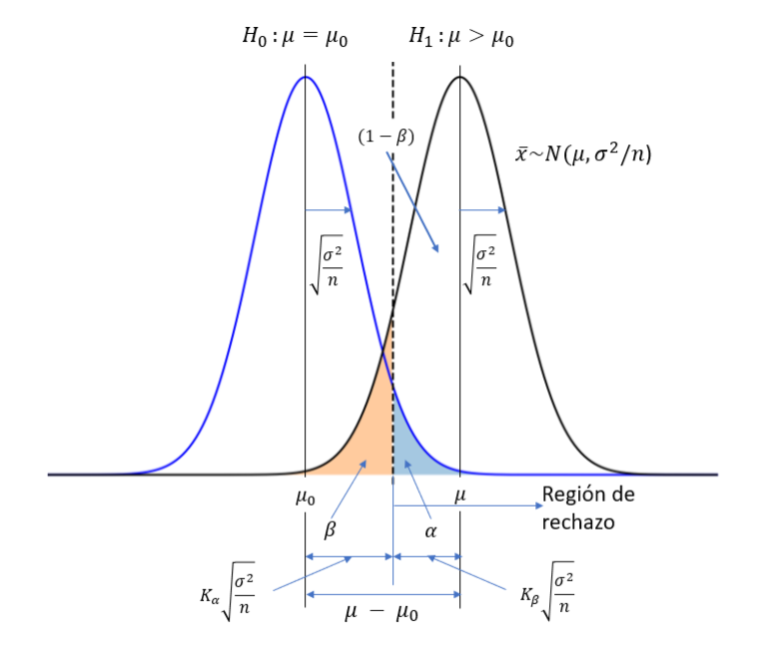

In [196]:
# 対象のURL
url = 'https://drive.google.com/file/d/1E1ZF7XXqVFLDD5U4U1wppdPyGUuqrc2U/view?usp=drive_link'
out = "./Graph3/Fig_4_1.png"

get_file_id(url,out)

In [197]:
notebook_name = 'QCKentei1-4.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")
print(notebook_name + '  ->  ' + notebook_name_html)

!jupyter nbconvert --to html {notebook_name}

QCKentei1-4.ipynb  ->  QCKentei1-4.html
[NbConvertApp] Converting notebook QCKentei1-4.ipynb to html
[NbConvertApp] Writing 1453905 bytes to QCKentei1-4.html
